**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


### Check no.of records and features given in each dataset

In [4]:
books.shape

(271360, 8)

In [5]:
print(books.columns.tolist())

['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [6]:
users.shape

(278858, 3)

In [7]:
print(users.columns.tolist())

['userID', 'Location', 'Age']


In [8]:
ratings.shape

(1149780, 3)

In [9]:
print(ratings.columns.tolist())

['userID', 'ISBN', 'bookRating']


## Exploring books dataset

In [10]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [11]:
books=books.drop(columns=['imageUrlS','imageUrlM','imageUrlL'])


In [12]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [13]:
print(books['yearOfPublication'].unique())

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '1952' '1940' '1951' '1931' '1954

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [14]:
books.loc[books.yearOfPublication=='DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [15]:
books.loc[books.yearOfPublication=='Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [16]:
books.drop(books[books['yearOfPublication'] == 'DK Publishing Inc'].index, inplace = True) 

In [17]:
books.drop(books[books['yearOfPublication'] == 'Gallimard'].index, inplace = True) 

In [18]:
print (books['yearOfPublication'].unique())

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '1952' '1940' '1951' '1931' '1954

It can now be seen that yearOfPublication has values ranging from 0–2050.

### Change the datatype of yearOfPublication to 'int'

In [19]:
books.yearOfPublication = books.yearOfPublication.astype(np.int32)

In [20]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [21]:
books.loc[books.publisher.isnull()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [22]:
books=books.dropna(subset=['publisher'])


In [23]:
books.isnull().any()

ISBN                 False
bookTitle            False
bookAuthor            True
yearOfPublication    False
publisher            False
dtype: bool

## Exploring Users dataset

In [24]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [25]:
print(sorted(users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [26]:
users.loc[(users.Age>90) |(users.Age<5)]=np.NaN

### Replace null values in column `Age` with mean

In [27]:
users.Age= users.Age.fillna(users.Age.mean())

### Change the datatype of `Age` to `int`

In [28]:
users.Age= users.Age.astype(np.int32)

In [29]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [30]:
ratings.shape

(1149780, 3)

In [31]:
n_users = users.shape[0]
n_books = books.shape[0]

In [32]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [33]:
ratings=ratings[ratings.ISBN.isin(books.ISBN)]

In [34]:
ratings.shape

(1031130, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [35]:
ratings=ratings[ratings.userID.isin(users.userID)]

In [36]:
ratings.shape

(1026151, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [37]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

In [38]:
ratings_explicit=ratings[ratings.bookRating !=0]
ratings_implicit=ratings[ratings.bookRating ==0]
ratings_explicit.shape

(382114, 3)

### Find out which rating has been given highest number of times

In [39]:
ratings_explicit['bookRating'].value_counts()

8     91365
10    70963
7     66101
9     60497
5     45154
6     31551
4      7576
3      5082
2      2360
1      1465
Name: bookRating, dtype: int64

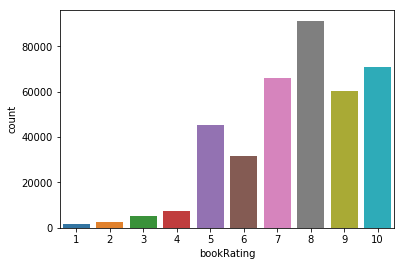

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=ratings_explicit, x='bookRating')
plt.show()

A countplot of bookRating indicates that rating 8 has been rated highest number of times.

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [42]:
count=ratings_explicit['userID'].value_counts()
ratings_explicit=ratings_explicit[ratings_explicit['userID'].isin(count[count >=100].index)]
count1=ratings_explicit['bookRating'].value_counts()
ratings_explicit=ratings_explicit[ratings_explicit['bookRating'].isin(count1[count1 >=100].index)]

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [43]:
ratings_matrix=ratings_explicit.pivot(index='userID', columns='ISBN', values='bookRating').fillna(0)
userId = ratings_matrix.index
ISBN = ratings_matrix.columns
print (ratings_matrix.shape)
ratings_matrix.head()

(447, 66423)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
ratings_matrix.isna().sum().sum()

0

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [45]:
from scipy.linalg import svd

In [46]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ratings_matrix, k = 50)

In [47]:
sigma

array([147.90973117, 149.34000605, 150.07386254, 152.19912576,
       152.87115177, 154.61236683, 154.78181262, 155.95362558,
       158.05610221, 159.20779926, 159.81356339, 162.01849435,
       162.7719574 , 163.32748165, 166.02208939, 166.81338417,
       168.04127851, 170.77476194, 171.01291261, 173.29116651,
       174.56321982, 176.64629212, 178.61901314, 180.2924078 ,
       182.24879951, 184.10546477, 187.61169273, 189.75154756,
       190.96960851, 195.14471979, 199.82566731, 201.70082024,
       202.18680411, 203.48555179, 207.26044986, 209.91587015,
       213.23540889, 216.87913075, 224.26847438, 231.66158183,
       235.67048655, 249.94817229, 252.02371864, 261.22713428,
       267.96628979, 281.00412303, 293.69384405, 379.58220494,
       634.72414631, 680.30584995])

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [48]:
userID = 2110

In [49]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [50]:
sigma = np.diag(sigma)
sigma

array([[147.90973117,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 149.34000605,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 150.07386254, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 379.58220494,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        634.72414631,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 680.30584995]])

In [51]:
all_users_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [52]:
preds_df = pd.DataFrame(all_users_predicted_ratings, columns = ratings_matrix.columns)
preds_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
0,0.025351,-0.002174,-0.001449,-0.002174,-0.002174,0.002987,-0.003932,0.007030,0.007030,0.012337,...,0.000181,0.000227,0.042173,-0.016820,-0.080209,0.004754,0.028294,0.000121,-0.001675,0.067534
1,-0.010009,-0.003679,-0.002452,-0.003679,-0.003679,0.001078,0.001443,-0.003501,-0.003501,0.001613,...,-0.000363,0.000401,0.008203,0.001094,-0.029222,0.000997,0.002360,-0.000242,0.000030,-0.013055
2,-0.015075,-0.015525,-0.010350,-0.015525,-0.015525,0.007305,-0.013975,0.011954,0.011954,0.011908,...,-0.000448,0.001923,0.047933,0.005715,0.118426,0.006996,0.003137,-0.000299,0.009068,-0.057819
3,-0.021511,0.035632,0.023755,0.035632,0.035632,0.030263,0.024293,-0.000977,-0.000977,0.067608,...,0.002977,0.009925,0.085647,-0.008699,0.017034,0.028873,-0.000043,0.001985,0.031172,-0.046818
4,0.002056,-0.008016,-0.005344,-0.008016,-0.008016,0.002961,0.003092,0.000234,0.000234,0.006160,...,0.002124,0.001608,-0.012244,0.009408,0.673979,0.002633,-0.008211,0.001416,0.004959,0.047685


In [53]:
def recommend_books(predictions_df, userID,userId, books_df, original_ratings_df, num_recommendations = False):
    user_row_number = userID   #UserID starts at zero not 1
    sorted_user_predictions = predictions_df.loc[user_row_number].sort_values(ascending = False)
    
    user_data = original_ratings_df[original_ratings_df.userID == (userId)]
    user_full = (user_data.merge(books, how = 'left', left_on = 'ISBN', right_on = 'ISBN').
                sort_values(['bookRating'], ascending = False))
    print('User {0} has already rated {1} books.'.format(userID, user_full.dropna().shape[0]))
    print('Recommending the highest {0} predicted ratings books not already read.'.format(num_recommendations))
    
    recommendations = (books_df[~books_df['ISBN'].isin(user_full['ISBN'])].
                      merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',left_on = 'ISBN',
                      right_on = 'ISBN').
                      rename(columns = {user_row_number: 'Predictions'}).
                      sort_values('Predictions', ascending = False).
                      iloc[:num_recommendations, :-1])
    return user_full, recommendations, sorted_user_predictions, user_data, user_full

In [ ]:
already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_books(preds_df, 2,2110,books, ratings, 10)

User 2 has already rated 163 books.
Recommending the highest 10 predicted ratings books not already read.


In [59]:
#predicted ratings for userID 2110
predictions

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
405,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2111,0345350499,The Mists of Avalon,MARION ZIMMER BRADLEY,1987,Del Rey
2432,0440214041,The Pelican Brief,John Grisham,1993,Dell
453,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
519,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
20610,0345318862,Golem in the Gears (Xanth Novels (Paperback)),PIERS ANTHONY,1986,Del Rey
4795,0345313151,Bearing an Hourglass (Incarnations of Immortal...,Piers Anthony,1991,Del Rey Books
6304,0380752891,"Man from Mundania (Xanth Trilogy, No 12)",Piers Anthony,1990,Harper Mass Market Paperbacks
44388,051511605X,Undue Influence,Steven Paul Martini,1995,Jove Books
8959,043936213X,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001,Scholastic


In [60]:
# Sorted predictions in descending order
sorted_user_predictions

ISBN
0316666343    1.004378
059035342X    0.778162
0345350499    0.700312
0440214041    0.666304
044021145X    0.664469
0312195516    0.646632
0345318862    0.640019
0345313151    0.632222
0380752891    0.629934
051511605X    0.618362
043936213X    0.615579
0385504209    0.615438
0312966970    0.607849
0440213525    0.604782
0812548051    0.603416
0380752859    0.599259
0345322231    0.589077
0345318854    0.579780
0452282152    0.574901
0812548094    0.571784
0812517725    0.565070
0345322215    0.561424
0440211727    0.560996
0380759489    0.560914
0812551478    0.558276
006016848X    0.551893
0345313097    0.548152
0886774802    0.544846
0553280368    0.543724
0446310786    0.543107
                ...   
055321313X   -0.129236
0670835382   -0.131357
0836220854   -0.132032
0140251367   -0.132338
0375706062   -0.134734
0440404193   -0.135078
0679767789   -0.136048
0062501860   -0.136528
0140501800   -0.137328
0525941908   -0.137438
0515090166   -0.137669
0140328696   -0.138418
051509

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [63]:
user_data_2110 = ratings[ratings['userID'] == 2110]
user_data_2110.head()

,userID,ISBN,bookRating
14447,2110,0060506989,0
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14451,2110,0140298479,0


In [64]:
user_data_2110.shape

(163, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [67]:
user_full_info = user_data_2110.merge(books,how = 'left' , left_on ='ISBN' , right_on = 'ISBN')

In [68]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060506989,0,We Were Soldiers Once... and Young: Ia Drang--...,Harold G. Moore,2002,HarperTorch
1,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
2,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
3,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
4,2110,0140298479,0,Bridget Jones: The Edge of Reason,Helen Fielding,2001,Penguin Books


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [69]:
predictions

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
405,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2111,0345350499,The Mists of Avalon,MARION ZIMMER BRADLEY,1987,Del Rey
2432,0440214041,The Pelican Brief,John Grisham,1993,Dell
453,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
519,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
20610,0345318862,Golem in the Gears (Xanth Novels (Paperback)),PIERS ANTHONY,1986,Del Rey
4795,0345313151,Bearing an Hourglass (Incarnations of Immortal...,Piers Anthony,1991,Del Rey Books
6304,0380752891,"Man from Mundania (Xanth Trilogy, No 12)",Piers Anthony,1990,Harper Mass Market Paperbacks
44388,051511605X,Undue Influence,Steven Paul Martini,1995,Jove Books
8959,043936213X,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001,Scholastic


In [70]:
sorted_user_predictions1 = preds_df.loc[2].sort_values(ascending = False)

In [71]:
recommendations = (books[~books['ISBN'].isin(user_full['ISBN'])].
                      merge(pd.DataFrame(sorted_user_predictions1).reset_index(), how = 'left',
                           left_on = 'ISBN',
                           right_on = 'ISBN').rename(columns = {2: 'Predictions'}).
                      sort_values('Predictions', ascending = False).
                   iloc[:10, :-1])

In [72]:
recommendations

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
405,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2111,0345350499,The Mists of Avalon,MARION ZIMMER BRADLEY,1987,Del Rey
2432,0440214041,The Pelican Brief,John Grisham,1993,Dell
453,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
519,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
20610,0345318862,Golem in the Gears (Xanth Novels (Paperback)),PIERS ANTHONY,1986,Del Rey
4795,0345313151,Bearing an Hourglass (Incarnations of Immortal...,Piers Anthony,1991,Del Rey Books
6304,0380752891,"Man from Mundania (Xanth Trilogy, No 12)",Piers Anthony,1990,Harper Mass Market Paperbacks
44388,051511605X,Undue Influence,Steven Paul Martini,1995,Jove Books
8959,043936213X,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,2001,Scholastic
